In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

Now that I have validated the model, I will use it to demostrate some of it's capabilities by predicting home values across the entire dataset. 

In [2]:
X = pd.read_csv('data/independent_vars.csv')
y = pd.read_csv('data/dependent_var.csv')
X.drop('Unnamed: 0', axis = 1, inplace = True)
y.drop('Unnamed: 0', axis = 1, inplace = True)

linreg = LinearRegression()
model = linreg.fit(X,y)

In [3]:
scaled_pred_price = model.predict(X)
pred_price = scaled_pred_price

In [4]:
data = pd.read_csv('data/clean_housing.csv')

#Reverse the scaling of the price used in the model.
data['pred_price'] = (pred_price*185546)+451089

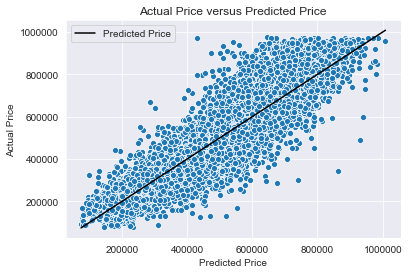

In [5]:
sns.set_style('darkgrid')
plt.title('Actual Price versus Predicted Price')
sns.scatterplot(x='pred_price', y='price', data = data)
sns.lineplot(x='pred_price', y='pred_price', data = data, 
             color = 'black', label = 'Predicted Price')
plt.legend()
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.savefig('figures/figure1.png');

To begin showcasing the capabilities of this model, I will isolate the impact of each target independent variable by imputing the mean of each column for the remaining values.

In [6]:
def isolate(iso, n_rows):
    mean_df = X.loc[:n_rows - 1]
    iso_series = np.linspace(X[iso].min(), 
                             X[iso].max(), n_rows)
    for col in X.columns:
        mean_df.loc[:, col] = X[col].mean()
    mean_df.loc[:, iso] = iso_series
    return mean_df

## Question 1
What month is best for selling a house?

In [9]:
iso_month = isolate('month_sold', 12)

In [10]:
iso_month.loc[:, 'month_sold^3'] = iso_month['month_sold']**3

In [12]:
iso_month[['month_sold', 'month_sold^3']]

month_sold  month_sold^3
0    -1.788865     -5.724438
1    -1.468173     -3.164692
2    -1.147480     -1.510899
3    -0.826788     -0.565174
4    -0.506095     -0.129627
5    -0.185403     -0.006373
6     0.135290      0.002476
7     0.455983      0.094808
8     0.776675      0.468509
9     1.097368      1.321467
10    1.418060      2.851570
11    1.738753      5.256703

In [14]:
y_pred = model.predict(iso_month)
pred_price = (y_pred*185546)+451089

In [15]:
Month_data = pd.DataFrame(['Jan', 'Feb', 'Mar', 'Apr',
                           'May', 'Jun', 'Jul', 'Aug',
                           'Sep', 'Oct', 'Nov', 'Dec'])

In [19]:
Month_data['Predicted Price'] = pred_price

In [35]:
Month_data['Average Price'] = 451089

In [36]:
Month_data

0  Predicted Price  Median Price  Average Price
0   Jan    451459.395929        420000         451089
1   Feb    460144.173229        420000         451089
2   Mar    463619.830213        420000         451089
3   Apr    463024.193537        420000         451089
4   May    459495.089859        420000         451089
5   Jun    454170.345834        420000         451089
6   Jul    448187.788120        420000         451089
7   Aug    442685.243373        420000         451089
8   Sep    438800.538251        420000         451089
9   Oct    437671.499410        420000         451089
10  Nov    440435.953508        420000         451089
11  Dec    448231.727200        420000         451089

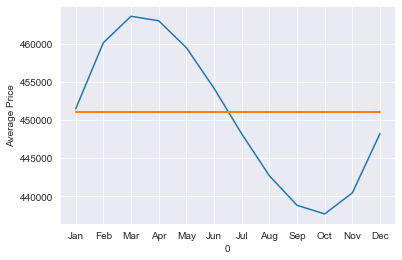

In [54]:
sns.lineplot(x=0, y='Predicted Price', data=Month_data, 
             sort = False)
sns.lineplot(x=0, y='Average Price', data=Month_data);

In [39]:
data['age'].describe()

count    16261.000000
mean        44.345797
std         30.288348
min         -1.000000
25%         16.000000
50%         44.000000
75%         65.000000
max        115.000000
Name: age, dtype: float64

In [41]:
iso_age = isolate('age', 116)

In [42]:
iso_age.loc[:, 'age^2'] = iso_age['age']**2
iso_age.loc[:, 'age^3'] = iso_age['age']**3

In [43]:
y_pred = model.predict(iso_age)
pred_price = (y_pred*185546)+451089

In [44]:
age_data = pd.DataFrame(range(0,116))

In [45]:
age_data['Predicted Price'] = pred_price

In [46]:
age_data['Average Price'] = 451089

In [47]:
age_data

0  Predicted Price  Average Price
0      0    457239.066268         451089
1      1    454194.837059         451089
2      2    451309.169794         451089
3      3    448579.335090         451089
4      4    446002.603560         451089
..   ...              ...            ...
111  111    481931.841475         451089
112  112    479825.094882         451089
113  113    477573.948538         451089
114  114    475175.673060         451089
115  115    472627.539062         451089

[116 rows x 3 columns]

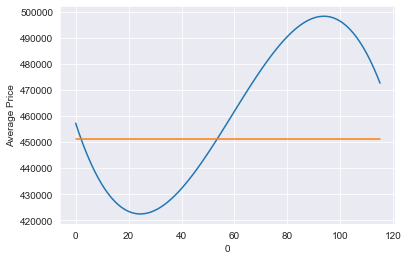

In [50]:
sns.lineplot(x=0, y='Predicted Price', data=age_data)
sns.lineplot(x=0, y='Average Price', data=age_data);

In [55]:
data['sqft_living'].describe()

count    16261.000000
mean      1843.576902
std        671.424738
min        370.000000
25%       1340.000000
50%       1750.000000
75%       2260.000000
max       4940.000000
Name: sqft_living, dtype: float64

In [57]:
iso_size = isolate('sqft_living', 4570)

In [64]:
iso_size.loc[:, 'sqft_living * Seattle'] = iso_size['sqft_living']*iso_size['Seattle']
iso_size.loc[:, 'sqft_living * Seattle^3'] = (iso_size['sqft_living']*iso_size['Seattle'])**3
iso_size.loc[:, 'sqft_living^3'] = iso_size['sqft_living']**3

In [65]:
y_pred = model.predict(iso_size)
pred_price = (y_pred*185546)+451089

In [67]:
size_data = pd.DataFrame(range(370, 4940))

In [68]:
size_data['Predicted Price'] = pred_price

In [69]:
size_data['Average Price'] = 451089

In [70]:
size_data

0  Predicted Price  Average Price
0      370    280805.920321         451089
1      371    280902.125562         451089
2      372    280998.376417         451089
3      373    281094.672855         451089
4      374    281191.014847         451089
...    ...              ...            ...
4565  4935    704249.721210         451089
4566  4936    704231.398135         451089
4567  4937    704212.979238         451089
4568  4938    704194.464488         451089
4569  4939    704175.853853         451089

[4570 rows x 3 columns]

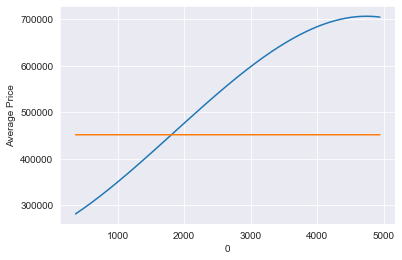

In [72]:
sns.lineplot(x=0, y='Predicted Price', data=size_data)
sns.lineplot(x=0, y='Average Price', data=size_data);